In [1]:
#Import modul
from PIL import Image                                   
import cv2                                              
import numpy as np                                      
import matplotlib.pyplot as plt 

In [2]:
import os
os.getcwd()

'C:\\Users\\Changcut\\Desktop\\ParkingSlot\\Slot'

In [3]:
image = cv2.imread("Gambar/Tes1.jpg") 
image = cv2.resize(image, (800,400), interpolation = cv2.INTER_AREA) 
state = 0 
sum_rows = 0 
sum_slots = []  
font = cv2.FONT_HERSHEY_PLAIN 

In [4]:
#cv2.imshow("Image",image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [5]:
#Fungsi untuk save output
def saved_1(output_SP): 
    cv2.imwrite ( 'Hasil/finalImage.jpg' ,output_SP) 
    return output_SP

In [6]:
#Fungsi konversi image ke array format numpy
def load_image_into_numpy_array(image):                 
  (im_width, im_height) = image.size                                   
  return np.array(image.getdata()).reshape(                            
    (im_height, im_width, 3)).astype(np.uint8)

In [7]:
#Fungsi untuk pemetaan kordinat
def coordinate(event, x, y, flags, param):               
  global refPt,keypoint,p,m,n,click,q,i,o                                
 
  if event == cv2.EVENT_LBUTTONDOWN:                                   
    refPt = (x, y)                                                   
    #print(refPt) 
    #p = p+1 
    keypoint.append(refPt)                                           
    #keypoint.append([]) 
    click = click + 1                                                  
    #print(click) 
    if click == 1:                                                    
      cv2.line(image,keypoint[m],keypoint[n],(0,0,255),2)           
      #print(keypoint[0]) 
      m = n                                                        
      n = n + 1                                                    
      click = 0                                                     
      #print(q) 

      if q < 1:                                                                                                 
        o = m                                                    
        o = o - i                                                
        i = i + 2                                                
        cv2.line(image,keypoint[o],keypoint[m],(0,0,255),2)      
      elif q > 0:                                                  
        q = q - 1                                                
                 
  return keypoint 

In [8]:
ROI_slot =[]  
imges = image.copy() 
original_clone = image.copy()  
clone = Image.fromarray(original_clone)

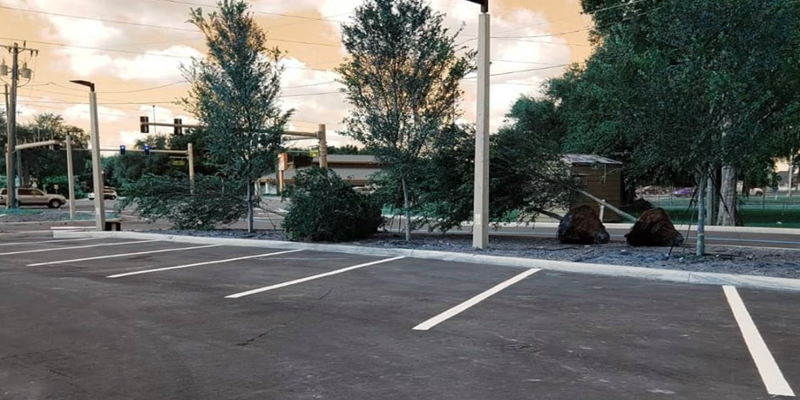

In [9]:
clone

In [10]:
while True:                                             
    # display the image and wait for a keypress 
    one = str(sum_rows) 
    two = str(sum_slots) 
    three = str(state+1) 
    cv2.putText(image,(one+"="+two), (100,100), font, 2, (0,0,255),1) 
    cv2.putText(image,three, (30,30), font, 2, (0,0,255),1) 
    cv2.imshow("Image",image)                          
    key = cv2.waitKey(1) & 0xFF                         
    if key == ord("p"):  
        sum_rows = sum_rows +1 
        sum_slots.append(0) 
        image = original_clone.copy() 
    if key == ord("l"): 
        state=state+1 
        if state==sum_rows: 
            state = 0 
        image = original_clone.copy() 
    if key == ord("o"): 
        sum_slots[state] = sum_slots[state] +1 
        image = original_clone.copy() 
    elif key == ord("c"):                               
        break                                           
cv2.destroyAllWindows()

In [11]:
image = original_clone.copy() 
for row in range(sum_rows): 
    refPt = []                                              
    keypoint = []    
    sigma_point = []

     #p =-1                                               
    n = 1                                                   
    q = sum_slots[row] + n                                     
    m = 0                                                   
    click = -1                                               
    i = 3                                                   
 
    cv2.namedWindow("image")                               
    cv2.setMouseCallback("image", coordinate)                
 
    while True:                                             
        # display the image and wait for a keypress 
        cv2.imshow("image", image)                          
        key = cv2.waitKey(1) & 0xFF                         
 
        # if the 'r' key is pressed, reset the cropping region 
        if key == ord("r"):                                   
            image = original_clone.copy()                   
            refPt = []                                      
            keypoint = []                                    
            #p =-1                                               
            n = 1                                           
            q = sum_slots + n                             
            m = 0                                           
            click = -1                                       
            i = 3  
 
             
        # if the 'c' key is pressed, break from the loop 
        elif key == ord("c"):                               
            break                                           
    cv2.destroyAllWindows()                                 
 
    sigma_point = len(keypoint)                                                               
    j = sigma_point-1                                                                         
    sigma_slot = int((sigma_point-2)/2)                                                       
 
    ROI_slot.append([])                                                                             
    for i in range(sigma_slot): 
        ROI_slot[row].append([]) 
        ROI_slot[row][i].append(keypoint[i])                                                       
        ROI_slot[row][i].append(keypoint[i+1])                                                     
        ROI_slot[row][i].append(keypoint[j-1])                                                     
        ROI_slot[row][i].append(keypoint[j])                                                       
        j=j-1         

In [12]:
ROI_slot

[[[(780, 387), (733, 290), (24, 263), (71, 285)],
  [(733, 290), (536, 269), (36, 243), (24, 263)],
  [(536, 269), (424, 328), (76, 243), (36, 243)],
  [(424, 328), (778, 389), (134, 237), (76, 243)],
  [(778, 389), (423, 327), (32, 263), (134, 237)],
  [(423, 327), (529, 270), (14, 253), (32, 263)],
  [(529, 270), (405, 255), (155, 238), (14, 253)],
  [(405, 255), (233, 297), (125, 277), (155, 238)],
  [(233, 297), (403, 258), (308, 249), (125, 277)],
  [(403, 258), (307, 249), (224, 245), (308, 249)],
  [(307, 249), (122, 277), (35, 266), (224, 245)]]]